In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the raw data
xls = pd.ExcelFile('updated_data (1) - Copy.xlsx')
df = xls.parse('Raw Data')

In [53]:
df

,Date,Customer,Particulars,Quantity,Price Per Case,Total As Per Case,Total Amount,Month,Year
0,2021-04-12,Gagan Store,7up 600ml Rs30,4 pc,640.00/pc,2560.0,NaN,4,2021
1,2021-04-12,Gagan Store,Pepsi 600ml Rs30,4 pc,640.00/pc,2560.0,NaN,4,2021
2,2021-04-12,Gagan Store,Mountain Dew 600ml Rs 30,4 pc,640.00/pc,2560.0,NaN,4,2021
3,2021-04-12,Gagan Store,Mirinda 600ml Rs30,4 pc,640.00/pc,2560.0,NaN,4,2021
4,2021-04-12,Gagan Store,AQUAFINA 1L PET 15 RS20,4 pc,180.00/pc,720.0,10960.0,4,2021
...,...,...,...,...,...,...,...,...,...
2366,2022-03-30,Cash,Tata Gulco Lemon,20 box,190.00/box,3800.0,NaN,3,2022
2367,2022-03-30,Cash,Froti Rs 10,15 pc,330.00/pc,4950.0,NaN,3,2022
2368,2022-03-30,Cash,STING 250ML PET24RS20,1 pc,540.00/pc,540.0,NaN,3,2022
2369,2022-03-31,Ganesh Naik,NaN,NaN,NaN,NaN,2120.0,3,2022


In [82]:
df = df[~df['Particulars'].astype(str).str.strip().str.lower().eq('agst ref')]

In [83]:

# Clean up columns
df.columns = [col.strip() for col in df.columns]

In [84]:
# Group by product and calculate total quantity sold
product_sales = df.groupby('Particulars')['Quantity'].sum().reset_index()

In [85]:
# Clean the Quantity column to extract only the numeric part
product_sales['Quantity'] = product_sales['Quantity'].astype(str).str.extract('(\d+)')

# Convert the extracted string to numeric (int)
product_sales['Quantity'] = pd.to_numeric(product_sales['Quantity'], errors='coerce')

# Drop rows where Quantity could not be converted
product_sales = product_sales.dropna(subset=['Quantity'])

# Now sort safely
product_sales_sorted = product_sales.sort_values(by='Quantity', ascending=False).head(10)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\smrut\AppData\Local\Temp\ipykernel_17548\957130608.py:2: SyntaxWarning: invalid escape sequence '\d'
  product_sales['Quantity'] = product_sales['Quantity'].astype(str).str.extract('(\d+)')


In [86]:
product_sales_sorted

,Particulars,Quantity
40,Froti Rs 10,5928
98,Tata Gulco Lemon,3638
84,STING 250ML PET24RS20,1214
21,Bonzo,698
14,Appy Fee Rs 10x40,637
45,Gobardhan Ghee 200mlx,507
46,Gobardhan Ghee 500mlx36,466
12,AQUAFINA 1L PET 15 RS20,370
16,B FIZZE RS10,313
49,Jaljeera,304


In [87]:
# Replace blank spaces in 'Total Amount' column with 0
df['Total Amount'] = df['Total Amount'].fillna(0)

C:\Users\smrut\AppData\Local\Temp\ipykernel_17548\3530411442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Amount'] = df['Total Amount'].fillna(0)


In [88]:
df['Quantity'] = df['Quantity'].apply(
        lambda x: 0 if pd.isna(x) or str(x).strip() == '' 
        else int(str(x).replace('pc', '').strip()) if 'pc' in str(x) 
        else x
    )

C:\Users\smrut\AppData\Local\Temp\ipykernel_17548\2774296722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = df['Quantity'].apply(


In [89]:
df['Quantity'] = df['Quantity'].apply(
        lambda x: 0 if pd.isna(x) or str(x).strip() == '' 
        else int(str(x).replace('box', '').strip()) if 'box' in str(x) 
        else x
    )

C:\Users\smrut\AppData\Local\Temp\ipykernel_17548\3325579119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = df['Quantity'].apply(


In [90]:
df

,Date,Customer,Particulars,Quantity,Price Per Case,Total As Per Case,Total Amount,Month,Year
0,2021-04-12,Gagan Store,7up 600ml Rs30,4,640.00/pc,2560.0,0,4,2021
1,2021-04-12,Gagan Store,Pepsi 600ml Rs30,4,640.00/pc,2560.0,0,4,2021
2,2021-04-12,Gagan Store,Mountain Dew 600ml Rs 30,4,640.00/pc,2560.0,0,4,2021
3,2021-04-12,Gagan Store,Mirinda 600ml Rs30,4,640.00/pc,2560.0,0,4,2021
4,2021-04-12,Gagan Store,AQUAFINA 1L PET 15 RS20,4,180.00/pc,720.0,10960,4,2021
...,...,...,...,...,...,...,...,...,...
2366,2022-03-30,Cash,Tata Gulco Lemon,20,190.00/box,3800.0,0,3,2022
2367,2022-03-30,Cash,Froti Rs 10,15,330.00/pc,4950.0,0,3,2022
2368,2022-03-30,Cash,STING 250ML PET24RS20,1,540.00/pc,540.0,0,3,2022
2369,2022-03-31,Ganesh Naik,NaN,0,NaN,NaN,2120,3,2022


In [91]:
df['Quantity']

0        4
1        4
2        4
3        4
4        4
        ..
2366    20
2367    15
2368     1
2369     0
2370     4
Name: Quantity, Length: 2354, dtype: int64

In [92]:
df['Quantity'].dtype

dtype('int64')

In [93]:
df['Total Amount'] = df['Total Amount'].astype(int)

C:\Users\smrut\AppData\Local\Temp\ipykernel_17548\3167120946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Amount'] = df['Total Amount'].astype(int)


C:\Users\smrut\AppData\Local\Temp\ipykernel_17548\2926163385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales_sorted, x='Particulars', y='Quantity', palette='viridis')


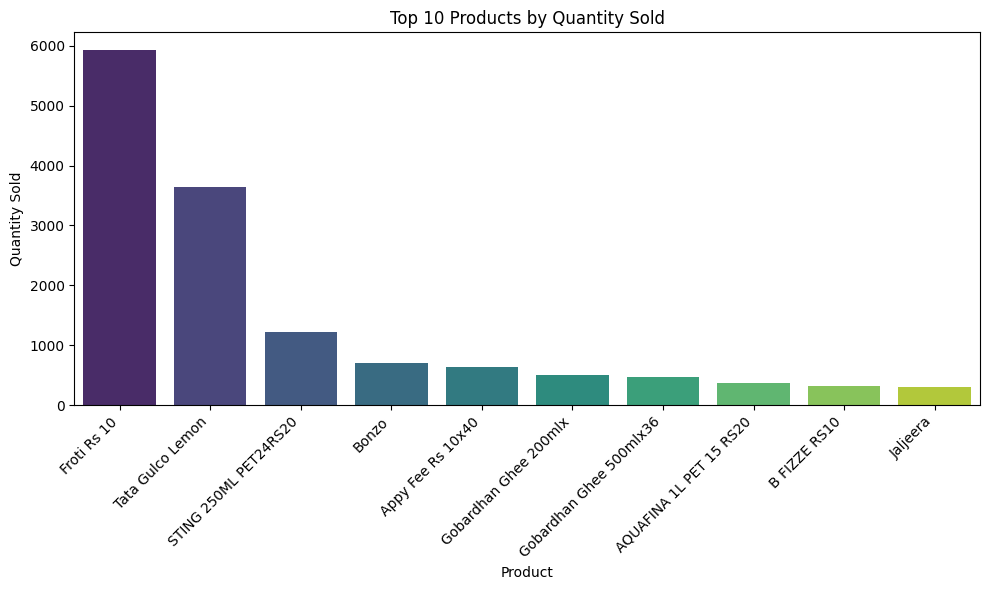

In [94]:
# Bar plot for top 10 products by quantity sold
plt.figure(figsize=(10, 6))
sns.barplot(data=product_sales_sorted, x='Particulars', y='Quantity', palette='viridis')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\smrut\AppData\Local\Temp\ipykernel_17548\1205093991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\smrut\AppData\Local\Temp\ipykernel_17548\1205093991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
C:\Users\smrut\AppData\Local\Temp\ipykernel_17548\1205093991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

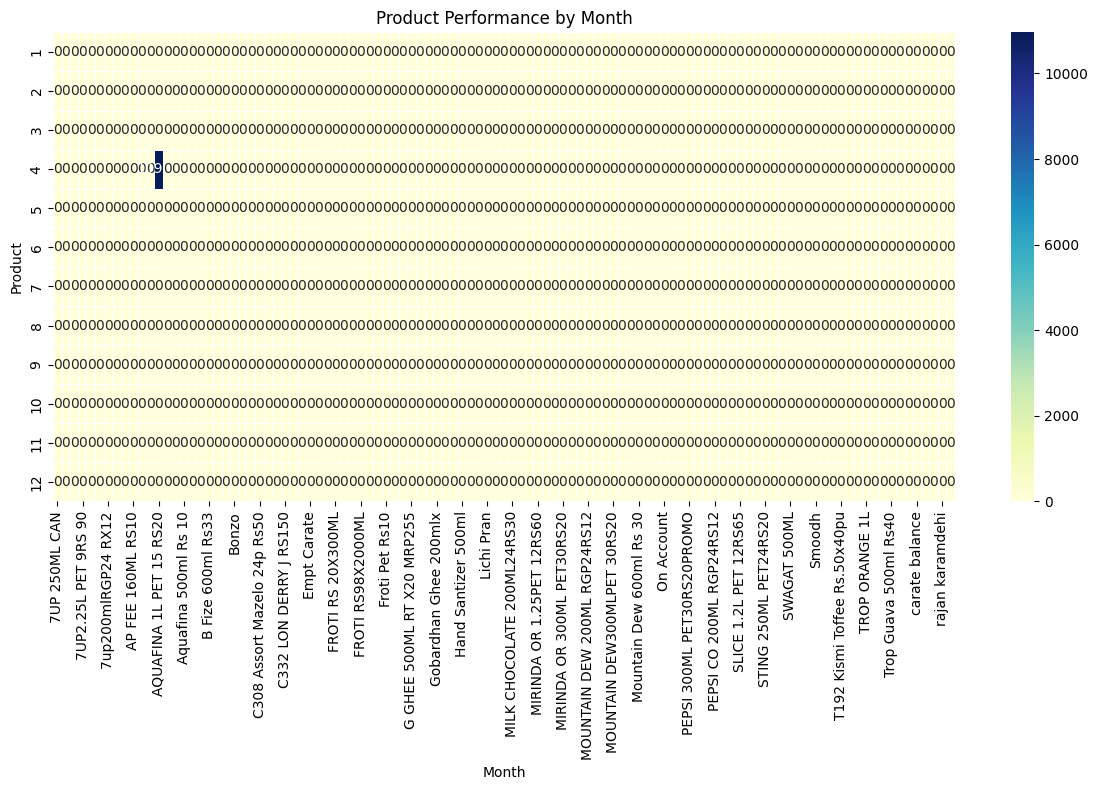

In [95]:
# Convert 'Date' to datetime and extract month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month and product, calculating total sales
monthly_product_sales = df.groupby(['Month', 'Particulars'])['Total Amount'].sum().unstack().fillna(0)

# Heatmap visualization of product performance by month
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_product_sales, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Product Performance by Month')
plt.xlabel('Month')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


C:\Users\smrut\AppData\Local\Temp\ipykernel_17548\2617125464.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_revenue_sorted, x='Particulars', y='Total Amount', palette='viridis', ax=ax1)


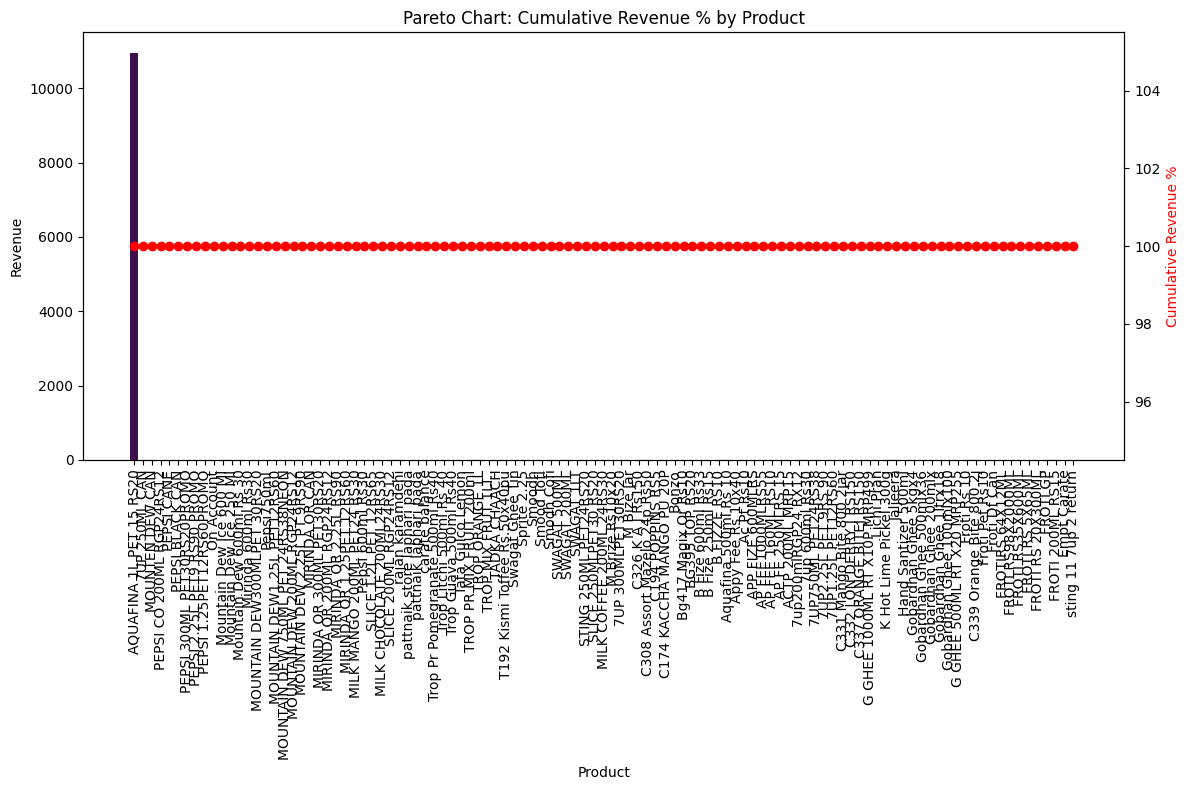

In [96]:
# Group by product to calculate total revenue
product_revenue = df.groupby('Particulars')['Total Amount'].sum().reset_index()

# Sort by revenue in descending order
product_revenue_sorted = product_revenue.sort_values(by='Total Amount', ascending=False)

# Calculate cumulative revenue percentage
product_revenue_sorted['Cumulative Revenue'] = product_revenue_sorted['Total Amount'].cumsum()
total_revenue = product_revenue_sorted['Total Amount'].sum()
product_revenue_sorted['Cumulative Revenue %'] = 100 * product_revenue_sorted['Cumulative Revenue'] / total_revenue

# Pareto chart (Bar + Line for cumulative %)
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for total revenue by product
sns.barplot(data=product_revenue_sorted, x='Particulars', y='Total Amount', palette='viridis', ax=ax1)
ax1.set_xlabel('Product')
ax1.set_ylabel('Revenue')
ax1.set_title('Pareto Chart: Cumulative Revenue % by Product')
ax1.tick_params(axis='x', rotation=90)

# Line plot for cumulative revenue percentage
ax2 = ax1.twinx()
ax2.plot(product_revenue_sorted['Particulars'], product_revenue_sorted['Cumulative Revenue %'], color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Revenue %', color='r')

plt.tight_layout()
plt.show()
